In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.preprocessing import OneHotEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,auc,accuracy_score,precision_recall_curve,roc_curve,auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from matplotlib import pyplot
from imblearn.pipeline import Pipeline
from numpy import argmax

In [3]:
dataset = pd.read_csv('C:/Users/c2080129/Downloads/Coursework_1_data(1).csv')

# Data exploration

First look at the data.

In [33]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [35]:
dataset.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [36]:
#Categorical features: 'Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'(Output)
#Numerical attributes: 'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
#'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay.

# Cleaning data

In [37]:
#Search if there are missing values and detect that the given dataset did not contain any.
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Numerical Variables

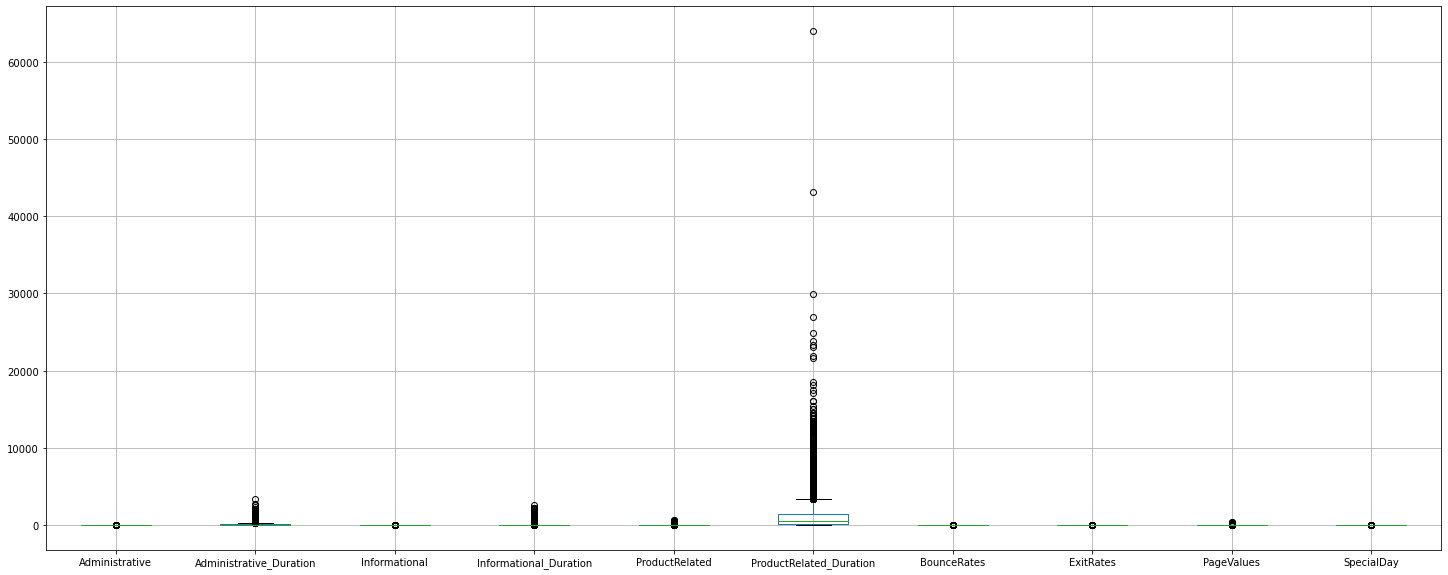

In [38]:
#Plotting bloxplots for all numerical variables to visualize them in one hand and to detect for outliers on the other.
#As can be seen from the graph there are a lot of values out of boxes and we consider them as outliers(we did not remove them
#cause we consider as crucial information).
num_feat = dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                    'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']]
plt.figure(figsize = (25,10)) 
num_feat.boxplot()

Plot histograms for each numerical feature to visualize useful information.

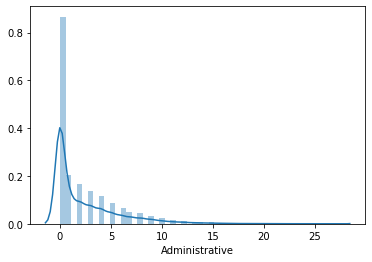

In [39]:
sns.distplot(dataset['Administrative'])

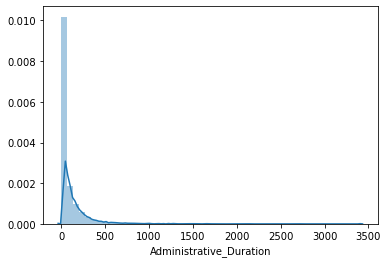

In [40]:
sns.distplot(dataset['Administrative_Duration'])

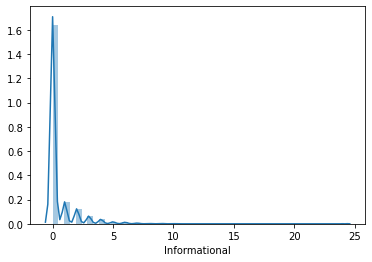

In [41]:
sns.distplot(dataset['Informational'],kde_kws = {'bw' : 0.2})

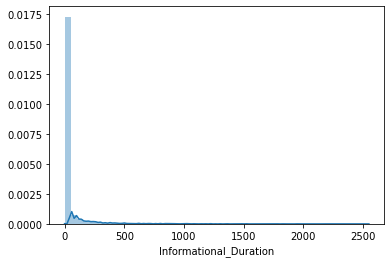

In [42]:
sns.distplot(dataset['Informational_Duration'],kde_kws = {'bw' :0.2})

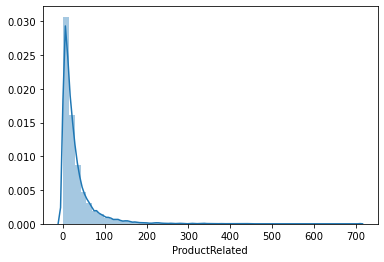

In [43]:
sns.distplot(dataset['ProductRelated'])

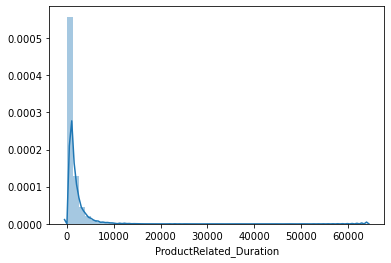

In [44]:
sns.distplot(dataset['ProductRelated_Duration'])

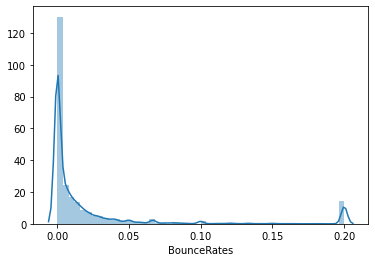

In [45]:
sns.distplot(dataset['BounceRates'])

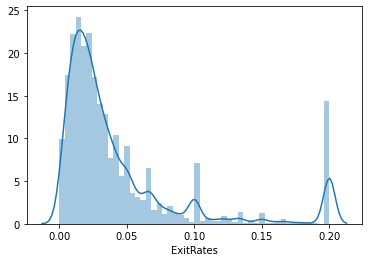

In [46]:
sns.distplot(dataset['ExitRates'])

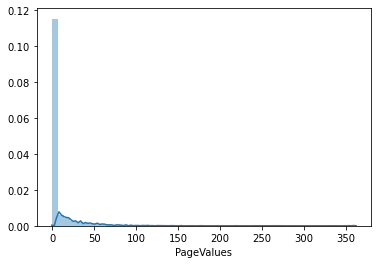

In [47]:
sns.distplot(dataset['PageValues'],kde_kws = {'bw' : 0.2})

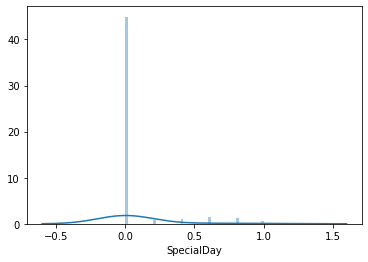

In [48]:
sns.distplot(dataset['SpecialDay'],kde_kws = {'bw' : 0.2})

# Categorical Variables
Count plot for each attribute to check how many values each category contains.

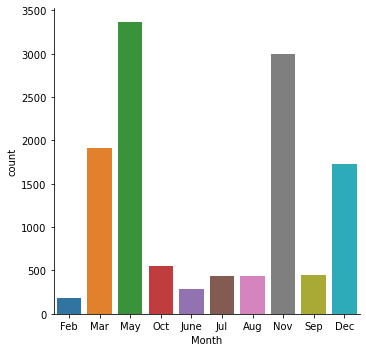

In [49]:
sns.catplot(x='Month', kind='count', data=dataset)

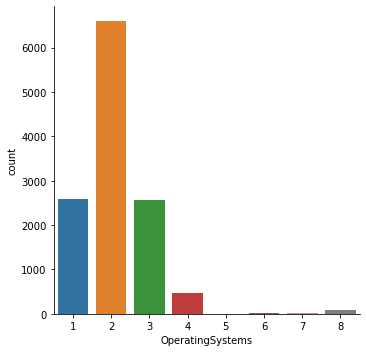

In [50]:
sns.catplot(x='OperatingSystems', kind='count', data=dataset)

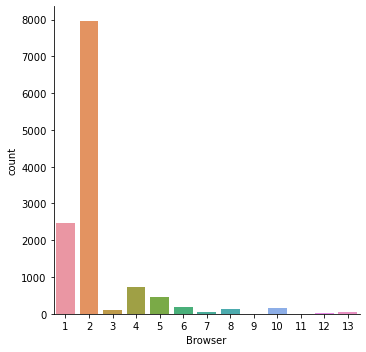

In [51]:
sns.catplot(x='Browser', kind='count', data=dataset)

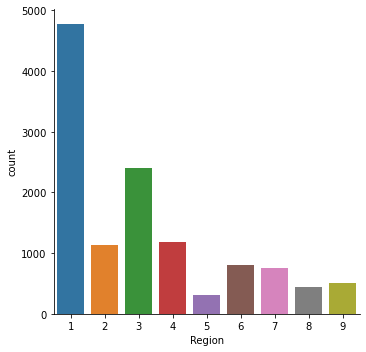

In [52]:
sns.catplot(x='Region', kind='count', data=dataset)

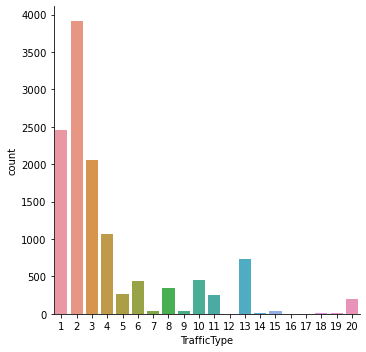

In [53]:
sns.catplot(x='TrafficType', kind='count', data=dataset)

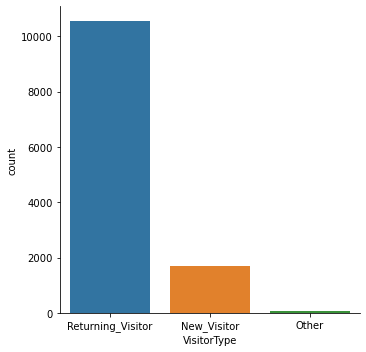

In [54]:
sns.catplot(x='VisitorType', kind='count', data=dataset)

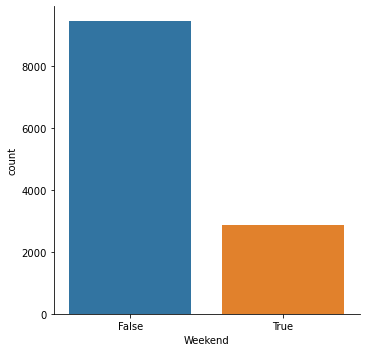

In [55]:
sns.catplot(x='Weekend', kind='count', data=dataset)

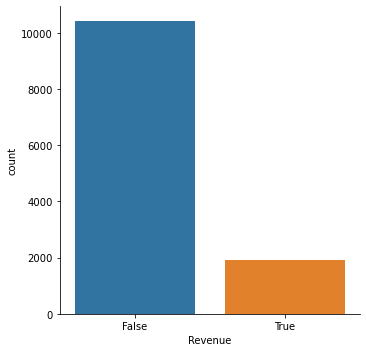

In [56]:
sns.catplot(x='Revenue', kind='count', data=dataset)

In [57]:
dataset['Revenue'].value_counts()
#We can easily detect that we have imbalance data cause False has approximately 5 times the values of True(ratio 5:1).

False    10422
True      1908
Name: Revenue, dtype: int64

# Correlation(Linear Dependence)

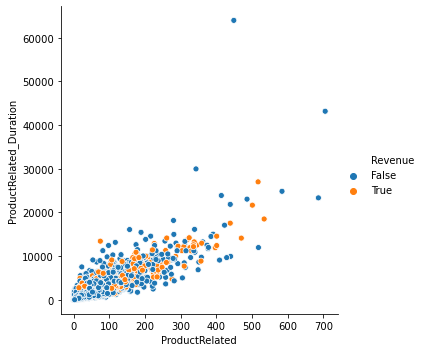

In [58]:
sns.relplot(
    data=dataset, x="ProductRelated", y="ProductRelated_Duration", hue="Revenue",
    kind="scatter")

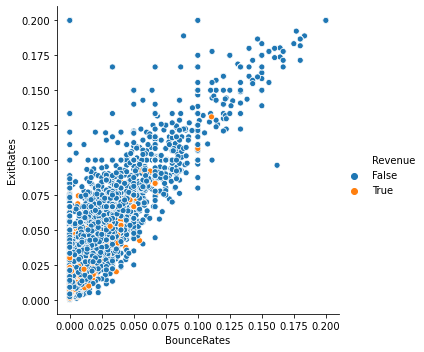

In [59]:
sns.relplot(
    data=dataset, x="BounceRates", y="ExitRates", hue="Revenue",
    kind="scatter")

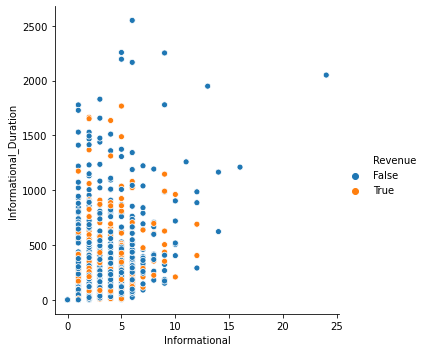

In [60]:
sns.relplot(
    data=dataset, x="Informational", y="Informational_Duration", hue="Revenue",
    kind="scatter")

In [61]:
#Looking both the scatter plots above and the correlation matrix below we understand linear collinearity between 
#Informational-Informational_Duration,ExitRates-BounceRates,ProductRelated-ProductRelated_Duration

In [62]:
Numeric_columns = dataset.drop(columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'])
corr = Numeric_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000


# 1st Model
First we are going to run the model in its simplest form.

In [63]:
dataset = pd.read_csv('C:/Users/c2080129/Downloads/Coursework_1_data(1).csv')

# Pre-processing

In [64]:
#Firstly we encode the output variable 'Revenue'
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(dataset[['Revenue',]])
dataset_c = pd.DataFrame(enc.transform(dataset[['Revenue',]]))
dataset_c.head()
dataset = pd.concat([dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                              'ProductRelated_Duration','ExitRates','BounceRates','PageValues','SpecialDay','Month',
                              'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']],dataset_c],axis=1)
dataset.rename(columns={0:'Revenue'},inplace=True)
dataset2 = dataset
dataset2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.0
1,0,0.0,0,0.0,2,64.000000,0.100000,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0.0
3,0,0.0,0,0.0,2,2.666667,0.140000,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0.0
4,0,0.0,0,0.0,10,627.500000,0.050000,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.029031,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,0.0
12326,0,0.0,0,0.0,5,465.750000,0.021333,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0.0
12327,0,0.0,0,0.0,6,184.250000,0.086667,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0.0
12328,4,75.0,0,0.0,15,346.000000,0.021053,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,0.0


In [65]:
#Seperate inputs from output.
datasetx = dataset2[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                     'ProductRelated_Duration','ProductRelated','ExitRates','BounceRates','PageValues','SpecialDay','OperatingSystems',
                     'Browser','TrafficType','Month','Region','Weekend','VisitorType']]
datasety = dataset2[['Revenue']]

#Splitting the data in 75% for training and 25% for testing.
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety, test_size=0.25, random_state=42)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ProductRelated,ExitRates,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,TrafficType,Region
count,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000
mean,2.297934,81.049415,0.507516,34.653222,1199.342987,31.702823,0.042631,0.021643,5.897237,0.059760,2.120255,2.355034,4.066724,3.158105
std,3.289023,177.074002,1.272992,140.677507,1939.730077,44.749761,0.047899,0.047521,18.683590,0.195951,0.905811,1.710480,4.025388,2.415942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,184.050000,7.000000,0.014286,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,7.100000,0.000000,0.000000,603.707143,18.000000,0.025000,0.002968,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000
75%,4.000000,91.950000,0.000000,0.000000,1474.515152,37.000000,0.050000,0.016667,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,63973.522230,705.000000,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,20.000000,9.000000


In [66]:
# transformer for categorical features
categorical_features = ['Weekend', 'Month', 'VisitorType','Browser','Region','TrafficType', 'OperatingSystems']
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
                            'ProductRelated_Duration','ProductRelated', 'ExitRates','BounceRates','PageValues','SpecialDay']
numeric_transformer = Pipeline(
    [
        ('scaler', PowerTransformer())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Classifiers

In [67]:
#define pipeline
model = LogisticRegression(random_state=42)
steps = [('preprocessing', preprocessor),('model', model)]
pipeline = Pipeline(steps=steps)

#fit pipeline
pipe = pipeline.fit(X_train,y_train)
print(model)

#results
y_pred = pipe.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.70      0.58      0.63       489

    accuracy                           0.89      3083
   macro avg       0.81      0.77      0.79      3083
weighted avg       0.89      0.89      0.89      3083

Accuracy: 0.893934


C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
#define pipeline
model1 = SVC(random_state=42,probability=True)
steps = [('preprocessing', preprocessor),('model', model1)]
pipeline1 = Pipeline(steps=steps)

#fit pipeline
pipe1 = pipeline1.fit(X_train,y_train)
print(model1)

#results
y_pred1 = pipe1.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred1))
accuracy1 = accuracy_score(y_test,y_pred1)
print('Accuracy: %f' % accuracy1)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.71      0.59      0.64       489

    accuracy                           0.90      3083
   macro avg       0.81      0.77      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.895556


In [69]:
#define pipeline
model2 = XGBClassifier(random_state=42)
steps = [('preprocessing', preprocessor),('model', model2)]
pipeline2 = Pipeline(steps=steps)

#fit pipeline
pipe2 = pipeline2.fit(X_train,y_train)
print(model2)

#results
y_pred2 = pipe2.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred2))
accuracy2 = accuracy_score(y_test,y_pred2)
print('Accuracy: %f' % accuracy2)

C:\Users\c2080129\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[23:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94

In all 3 models we took into consideration precision,recall,f1-score and AUC in terms of model perfomance whereas the Accuracy 
is not reliable because of imbalance(as indicated in previous section). 

# 2nd Model
In this section we added in first model the binning technique and we also used vif in order to reduce multicollinearity.

In [70]:
dataset = pd.read_csv('C:/Users/c2080129/Downloads/Coursework_1_data(1).csv')

# Binning 
We divided true's with false's of the output in each category of a categorical variable and then we placed them in a bin based on the percentages(close percentages fit in the same bin).

In [71]:
#Binning technique for categorical feature 'OperatingSystems'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.

for t in range(1,9):
    ost=dataset.loc[(dataset['OperatingSystems'] == t) & (dataset['Revenue'] == True)].OperatingSystems.sum()
    osf=dataset.loc[(dataset['OperatingSystems'] == t) & (dataset['Revenue'] == False)].OperatingSystems.sum()  
    perc3 = ost/osf
    print(t,':',perc3) 

1 : 0.17180417044424298
2 : 0.2120822622107969
3 : 0.11718408395277656
4 : 0.21628498727735368
5 : 0.2
6 : 0.11764705882352941
7 : 0.16666666666666666
8 : 0.27419354838709675


In [72]:
conditions = [
    dataset['OperatingSystems'] == 1,
    dataset['OperatingSystems'] == 2,
    dataset['OperatingSystems'] == 3,
    dataset['OperatingSystems'] == 4,
    dataset['OperatingSystems'] == 5,
    dataset['OperatingSystems'] == 6,
    dataset['OperatingSystems'] == 7,
    dataset['OperatingSystems'] == 8]

choices = ['1','2','3','2','2','3','1','4']

dataset['NewOperatingSystems'] = np.select(conditions, choices, default='Other')

In [73]:
#dropping the 'OperatingSystems' column and adding the one calculated with binning technique.
dataset['NewOperatingSystems'].value_counts()
dataset.drop(['OperatingSystems'], axis=1, inplace = True)

In [74]:
#Binning technique for categorical feature 'Browser'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.
for t in range(1,14):
    bt=dataset.loc[(dataset['Browser'] == t) & (dataset['Revenue'] == True)].Browser.sum()
    bf=dataset.loc[(dataset['Browser'] == t) & (dataset['Revenue'] == False)].Browser.sum()  
    perc3 = bt/bf
    print(t,':',perc3)

1 : 0.17405817835002385
2 : 0.1815078658355595
3 : 0.05
4 : 0.2145214521452145
5 : 0.22572178477690288
6 : 0.12987012987012986
7 : 0.13953488372093023
8 : 0.18421052631578946
9 : 0.0
10 : 0.24427480916030533
11 : 0.2
12 : 0.42857142857142855
13 : 0.35555555555555557


In [75]:
conditions1 = [
    dataset['Browser'] == 1,
    dataset['Browser'] == 2,
    dataset['Browser'] == 3,
    dataset['Browser'] == 4,
    dataset['Browser'] == 5,
    dataset['Browser'] == 6,
    dataset['Browser'] == 7,
    dataset['Browser'] == 8,
    dataset['Browser'] == 9,
    dataset['Browser'] == 10,
    dataset['Browser'] == 11,
    dataset['Browser'] == 12,
    dataset['Browser'] == 13]

choices1 = ['1','1','3','2','2','4','4','1','3','2','1','5','5']

dataset['NewBrowser'] = np.select(conditions1, choices1, default='Other')

In [76]:
#dropping the 'OperatingSystems' column and adding the one calculated with binning technique.
dataset['NewBrowser'].value_counts()
dataset.drop(['Browser'], axis=1, inplace = True)

In [77]:
#Binning technique for categorical feature 'TrafficType'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.
for x in range(1,21):
    ttt=dataset.loc[(dataset['TrafficType'] == x) & (dataset['Revenue'] == True)].TrafficType.sum()
    ttf=dataset.loc[(dataset['TrafficType'] == x) & (dataset['Revenue'] == False)].TrafficType.sum()
    perc3 = ttt/ttf
    print(x,':',perc3)

1 : 0.11968935587026039
2 : 0.2762557077625571
3 : 0.09615384615384616
4 : 0.18252212389380532
5 : 0.27450980392156865
6 : 0.13554987212276215
7 : 0.42857142857142855
8 : 0.38306451612903225
9 : 0.10526315789473684
10 : 0.25
11 : 0.235
12 : 0.0
13 : 0.0618705035971223
14 : 0.18181818181818182
15 : 0.0
16 : 0.5
17 : 0.0
18 : 0.0
19 : 0.0625
20 : 0.33783783783783783


In [78]:
conditions2 = [
    dataset['TrafficType'] == 1,
    dataset['TrafficType'] == 2,
    dataset['TrafficType'] == 3,
    dataset['TrafficType'] == 4,
    dataset['TrafficType'] == 5,
    dataset['TrafficType'] == 6,
    dataset['TrafficType'] == 7,
    dataset['TrafficType'] == 8,
    dataset['TrafficType'] == 9,
    dataset['TrafficType'] == 10,
    dataset['TrafficType'] == 11,
    dataset['TrafficType'] == 12,
    dataset['TrafficType'] == 13,
    dataset['TrafficType'] == 14,
    dataset['TrafficType'] == 15,
    dataset['TrafficType'] == 16,
    dataset['TrafficType'] == 17,
    dataset['TrafficType'] == 18,
    dataset['TrafficType'] == 19,
    dataset['TrafficType'] == 20]
    

choices2 = ['1','2','1','3','2','1','4','5','1','2','2','6','7','3','6','4','6','6','7','5']

dataset['NewTrafficType'] = np.select(conditions2, choices2, default='Other')

In [79]:
#dropping the 'OperatingSystems' column and adding the one calculated with binning technique.
dataset['NewTrafficType'].value_counts()
dataset.drop(['TrafficType'], axis=1, inplace = True)

# Multicollinearity
Using VIF function we calculated the numerical columns with multicollinearity and dropped them to reduce it.

In [80]:
def calc_vif(X):

 

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, k) for k in range(X.shape[1])]

 

    return(vif)

 

independent_columns = dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','ExitRates','BounceRates','PageValues','SpecialDay']]
print(type(independent_columns))

 

calc_vif(independent_columns)

<class 'pandas.core.frame.DataFrame'>


,variables,VIF
0,Administrative,2.651491
1,Administrative_Duration,2.041915
2,Informational,2.113723
3,Informational_Duration,1.777154
4,ProductRelated,6.339345
5,ProductRelated_Duration,6.012012
6,ExitRates,5.978858
7,BounceRates,5.557495
8,PageValues,1.077806
9,SpecialDay,1.105706


In [81]:
#Values greater than 5 indicate extreme multicollinearity.

In [82]:
#Dropping the values to reduce multicollinearity.
dataset.drop(['ProductRelated_Duration'], axis=1, inplace = True)
dataset.drop(['BounceRates'], axis=1, inplace = True)

In [83]:
#No multicolinearity

def calc_vif(X):

 

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, k) for k in range(X.shape[1])]

 

    return(vif)

 

independent_columns = dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                               'ProductRelated','ExitRates','PageValues','SpecialDay']]
print(type(independent_columns))

 

calc_vif(independent_columns)

<class 'pandas.core.frame.DataFrame'>


,variables,VIF
0,Administrative,2.564112
1,Administrative_Duration,1.922148
2,Informational,2.112900
3,Informational_Duration,1.730571
4,ProductRelated,1.813662
5,ExitRates,1.119284
6,PageValues,1.075445
7,SpecialDay,1.090461


# Pre-processing

In [84]:
#Firstly we encode the output variable 'Revenue'
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(dataset[['Revenue',]])
dataset_c = pd.DataFrame(enc.transform(dataset[['Revenue',]]))
dataset_c.head()
dataset = pd.concat([dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                              'ExitRates','PageValues','SpecialDay','Month',
                              'NewOperatingSystems','NewBrowser','Region','NewTrafficType','VisitorType','Weekend']],dataset_c],axis=1)
dataset.rename(columns={0:'Revenue'},inplace=True)
dataset2 = dataset
dataset2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,NewOperatingSystems,NewBrowser,Region,NewTrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.0
1,0,0.0,0,0.0,2,0.100000,0.000000,0.0,Feb,2,1,1,2,Returning_Visitor,False,0.0
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,2,1,9,1,Returning_Visitor,False,0.0
3,0,0.0,0,0.0,2,0.140000,0.000000,0.0,Feb,3,1,2,3,Returning_Visitor,False,0.0
4,0,0.0,0,0.0,10,0.050000,0.000000,0.0,Feb,3,3,1,3,Returning_Visitor,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.029031,12.241717,0.0,Dec,2,4,1,1,Returning_Visitor,True,0.0
12326,0,0.0,0,0.0,5,0.021333,0.000000,0.0,Nov,3,1,1,5,Returning_Visitor,True,0.0
12327,0,0.0,0,0.0,6,0.086667,0.000000,0.0,Nov,3,1,1,7,Returning_Visitor,True,0.0
12328,4,75.0,0,0.0,15,0.021053,0.000000,0.0,Nov,2,1,3,2,Returning_Visitor,False,0.0


In [85]:
#Seperate inputs from output.
datasetx = dataset2[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                     'ProductRelated','ExitRates','PageValues','SpecialDay','NewOperatingSystems',
                     'NewBrowser','NewTrafficType','Month','Region','Weekend','VisitorType']]
datasety = dataset2[['Revenue']]

#Splitting the data in 75% for training and 25% for testing.
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety, test_size=0.25, random_state=42)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Region
count,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000
mean,2.297934,81.049415,0.507516,34.653222,31.702823,0.042631,5.897237,0.059760,3.158105
std,3.289023,177.074002,1.272992,140.677507,44.749761,0.047899,18.683590,0.195951,2.415942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.014286,0.000000,0.000000,1.000000
50%,1.000000,7.100000,0.000000,0.000000,18.000000,0.025000,0.000000,0.000000,3.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,0.050000,0.000000,0.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,0.200000,361.763742,1.000000,9.000000


In [86]:
# transformer for categorical features
categorical_features = ['Weekend', 'Month', 'VisitorType','NewBrowser','Region','NewTrafficType', 'NewOperatingSystems']
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
                            'ProductRelated','ExitRates','PageValues','SpecialDay']
numeric_transformer = Pipeline(
    [
        ('scaler', PowerTransformer())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Classifiers

In [87]:
#define pipeline
model = LogisticRegression(random_state=42)
steps = [('preprocessing', preprocessor),('model', model)]
pipeline = Pipeline(steps=steps)

#fit pipeline
pipe = pipeline.fit(X_train,y_train)
print(model)

#results
y_pred = pipe.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2594
         1.0       0.70      0.58      0.64       489

    accuracy                           0.89      3083
   macro avg       0.81      0.77      0.79      3083
weighted avg       0.89      0.89      0.89      3083

Accuracy: 0.894908


C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
#define pipeline
model1 = SVC(random_state=42,probability=True)
steps = [('preprocessing', preprocessor),('model', model1)]
pipeline1 = Pipeline(steps=steps)

#fit pipeline
pipe1 = pipeline1.fit(X_train,y_train)
print(model1)

#results
y_pred1 = pipe1.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred1))
accuracy1 = accuracy_score(y_test,y_pred1)
print('Accuracy: %f' % accuracy1)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2594
         1.0       0.72      0.58      0.65       489

    accuracy                           0.90      3083
   macro avg       0.82      0.77      0.79      3083
weighted avg       0.89      0.90      0.89      3083

Accuracy: 0.898476


In [89]:
#define pipeline
model2 = XGBClassifier(random_state=42)
steps = [('preprocessing', preprocessor),('model', model2)]
pipeline2 = Pipeline(steps=steps)

#fit pipeline
pipe2 = pipeline2.fit(X_train,y_train)
print(model2)

#results
y_pred2 = pipe2.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred2))
accuracy2 = accuracy_score(y_test,y_pred2)
print('Accuracy: %f' % accuracy2)

C:\Users\c2080129\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[23:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94

# 3rd Model
This Model contains everything used in the 2nd Model and we will use particular parameters so as to reduce the imbalance in our
dataset.The 2nd Model was chosen over the 1st because it performed in a better way regarding the metrics.

In [5]:
dataset = pd.read_csv('C:/Users/c2080129/Downloads/Coursework_1_data(1).csv')

# Binning

In [6]:
#Binning technique for categorical feature 'OperatingSystems'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.
for t in range(1,9):
    ost=dataset.loc[(dataset['OperatingSystems'] == t) & (dataset['Revenue'] == True)].OperatingSystems.sum()
    osf=dataset.loc[(dataset['OperatingSystems'] == t) & (dataset['Revenue'] == False)].OperatingSystems.sum()  
    perc3 = ost/osf
    print(t,':',perc3)

1 : 0.17180417044424298
2 : 0.2120822622107969
3 : 0.11718408395277656
4 : 0.21628498727735368
5 : 0.2
6 : 0.11764705882352941
7 : 0.16666666666666666
8 : 0.27419354838709675


In [7]:
conditions = [
    dataset['OperatingSystems'] == 1,
    dataset['OperatingSystems'] == 2,
    dataset['OperatingSystems'] == 3,
    dataset['OperatingSystems'] == 4,
    dataset['OperatingSystems'] == 5,
    dataset['OperatingSystems'] == 6,
    dataset['OperatingSystems'] == 7,
    dataset['OperatingSystems'] == 8]

choices = ['1','2','3','2','2','3','1','4']

dataset['NewOperatingSystems'] = np.select(conditions, choices, default='Other')

In [8]:
#dropping the 'OperatingSystems' column and adding the one calculated with binning technique.
dataset['NewOperatingSystems'].value_counts()
dataset.drop(['OperatingSystems'], axis=1, inplace = True)

In [9]:
#Binning technique for categorical feature 'Browser'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.
for t in range(1,14):
    bt=dataset.loc[(dataset['Browser'] == t) & (dataset['Revenue'] == True)].Browser.sum()
    bf=dataset.loc[(dataset['Browser'] == t) & (dataset['Revenue'] == False)].Browser.sum()  
    perc3 = bt/bf
    print(t,':',perc3)

1 : 0.17405817835002385
2 : 0.1815078658355595
3 : 0.05
4 : 0.2145214521452145
5 : 0.22572178477690288
6 : 0.12987012987012986
7 : 0.13953488372093023
8 : 0.18421052631578946
9 : 0.0
10 : 0.24427480916030533
11 : 0.2
12 : 0.42857142857142855
13 : 0.35555555555555557


In [10]:
conditions = [
    dataset['Browser'] == 1,
    dataset['Browser'] == 2,
    dataset['Browser'] == 3,
    dataset['Browser'] == 4,
    dataset['Browser'] == 5,
    dataset['Browser'] == 6,
    dataset['Browser'] == 7,
    dataset['Browser'] == 8,
    dataset['Browser'] == 9,
    dataset['Browser'] == 10,
    dataset['Browser'] == 11,
    dataset['Browser'] == 12,
    dataset['Browser'] == 13]

choices = ['1','1','3','2','2','4','4','1','3','2','1','5','5']

dataset['NewBrowser'] = np.select(conditions, choices, default='Other')

In [11]:
#dropping the 'Browser' column and adding the one calculated with binning technique.
dataset['NewBrowser'].value_counts()
dataset.drop(['Browser'], axis=1, inplace = True)

In [12]:
#Binning technique for categorical feature 'TrafficType'. The reason is that some 'states' did not had too many 
#observations as presented on the count plot and this might cause overfit.
for x in range(1,21):
    ttt=dataset.loc[(dataset['TrafficType'] == x) & (dataset['Revenue'] == True)].TrafficType.sum()
    ttf=dataset.loc[(dataset['TrafficType'] == x) & (dataset['Revenue'] == False)].TrafficType.sum()
    perc3 = ttt/ttf
    print(x,':',perc3)

1 : 0.11968935587026039
2 : 0.2762557077625571
3 : 0.09615384615384616
4 : 0.18252212389380532
5 : 0.27450980392156865
6 : 0.13554987212276215
7 : 0.42857142857142855
8 : 0.38306451612903225
9 : 0.10526315789473684
10 : 0.25
11 : 0.235
12 : 0.0
13 : 0.0618705035971223
14 : 0.18181818181818182
15 : 0.0
16 : 0.5
17 : 0.0
18 : 0.0
19 : 0.0625
20 : 0.33783783783783783


In [13]:
conditions = [
    dataset['TrafficType'] == 1,
    dataset['TrafficType'] == 2,
    dataset['TrafficType'] == 3,
    dataset['TrafficType'] == 4,
    dataset['TrafficType'] == 5,
    dataset['TrafficType'] == 6,
    dataset['TrafficType'] == 7,
    dataset['TrafficType'] == 8,
    dataset['TrafficType'] == 9,
    dataset['TrafficType'] == 10,
    dataset['TrafficType'] == 11,
    dataset['TrafficType'] == 12,
    dataset['TrafficType'] == 13,
    dataset['TrafficType'] == 14,
    dataset['TrafficType'] == 15,
    dataset['TrafficType'] == 16,
    dataset['TrafficType'] == 17,
    dataset['TrafficType'] == 18,
    dataset['TrafficType'] == 19,
    dataset['TrafficType'] == 20]
    

choices = ['1','2','1','3','2','1','4','5','1','2','2','6','7','3','6','4','6','6','7','5']

dataset['NewTrafficType'] = np.select(conditions, choices, default='Other')

In [14]:
#dropping the 'TrafficType' column and adding the one calculated with binning technique.
dataset['NewTrafficType'].value_counts()
dataset.drop(['TrafficType'], axis=1, inplace = True)

# Multicollinearity

In [15]:
def calc_vif(X):

 

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, k) for k in range(X.shape[1])]

 

    return(vif)

 

independent_columns = dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','ExitRates','BounceRates','PageValues','SpecialDay']]
print(type(independent_columns))

 

calc_vif(independent_columns)

<class 'pandas.core.frame.DataFrame'>


,variables,VIF
0,Administrative,2.651491
1,Administrative_Duration,2.041915
2,Informational,2.113723
3,Informational_Duration,1.777154
4,ProductRelated,6.339345
5,ProductRelated_Duration,6.012012
6,ExitRates,5.978858
7,BounceRates,5.557495
8,PageValues,1.077806
9,SpecialDay,1.105706


In [16]:
#Values greater than 5 indicate extreme multicollinearity.

In [17]:
#Dropping the values to reduce multicollinearity.
dataset.drop(['ProductRelated_Duration'], axis=1, inplace = True)
dataset.drop(['BounceRates'], axis=1, inplace = True)

In [18]:
#No multicolinearity

def calc_vif(X):

 

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, k) for k in range(X.shape[1])]

 

    return(vif)

 

independent_columns = dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                               'ProductRelated','ExitRates','PageValues','SpecialDay']]
print(type(independent_columns))

 

calc_vif(independent_columns)

<class 'pandas.core.frame.DataFrame'>


,variables,VIF
0,Administrative,2.564112
1,Administrative_Duration,1.922148
2,Informational,2.112900
3,Informational_Duration,1.730571
4,ProductRelated,1.813662
5,ExitRates,1.119284
6,PageValues,1.075445
7,SpecialDay,1.090461


# Pre-processing

In [19]:
#Firstly we encode the output variable 'Revenue'
enc= OneHotEncoder(drop='first',sparse= False)
enc.fit(dataset[['Revenue',]])
dataset_c = pd.DataFrame(enc.transform(dataset[['Revenue',]]))
dataset_c.head()
dataset = pd.concat([dataset[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                              'ProductRelated','ExitRates','PageValues','SpecialDay','Month',
                              'NewOperatingSystems','NewBrowser','Region','NewTrafficType','VisitorType','Weekend']],dataset_c],axis=1)
dataset.rename(columns={0:'Revenue'},inplace=True)
dataset2 = dataset
dataset2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,NewOperatingSystems,NewBrowser,Region,NewTrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0.0
1,0,0.0,0,0.0,2,0.100000,0.000000,0.0,Feb,2,1,1,2,Returning_Visitor,False,0.0
2,0,0.0,0,0.0,1,0.200000,0.000000,0.0,Feb,2,1,9,1,Returning_Visitor,False,0.0
3,0,0.0,0,0.0,2,0.140000,0.000000,0.0,Feb,3,1,2,3,Returning_Visitor,False,0.0
4,0,0.0,0,0.0,10,0.050000,0.000000,0.0,Feb,3,3,1,3,Returning_Visitor,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,0.029031,12.241717,0.0,Dec,2,4,1,1,Returning_Visitor,True,0.0
12326,0,0.0,0,0.0,5,0.021333,0.000000,0.0,Nov,3,1,1,5,Returning_Visitor,True,0.0
12327,0,0.0,0,0.0,6,0.086667,0.000000,0.0,Nov,3,1,1,7,Returning_Visitor,True,0.0
12328,4,75.0,0,0.0,15,0.021053,0.000000,0.0,Nov,2,1,3,2,Returning_Visitor,False,0.0


In [20]:
#Seperate inputs from output.
datasetx = dataset2[['Administrative','Administrative_Duration','Informational','Informational_Duration',
                     'ProductRelated','ExitRates','PageValues','SpecialDay','NewOperatingSystems',
                     'NewBrowser','NewTrafficType','Month','Region','Weekend','VisitorType']]
datasety = dataset2[['Revenue']]

#Splitting the data in 75% for training and 25% for testing.
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety, test_size=0.25, random_state=42)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Region
count,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000
mean,2.297934,81.049415,0.507516,34.653222,31.702823,0.042631,5.897237,0.059760,3.158105
std,3.289023,177.074002,1.272992,140.677507,44.749761,0.047899,18.683590,0.195951,2.415942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.014286,0.000000,0.000000,1.000000
50%,1.000000,7.100000,0.000000,0.000000,18.000000,0.025000,0.000000,0.000000,3.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,0.050000,0.000000,0.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,0.200000,361.763742,1.000000,9.000000


In [21]:
# transformer for categorical features
categorical_features = ['Weekend', 'Month', 'VisitorType','NewBrowser','Region','NewTrafficType', 'NewOperatingSystems']
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
                            'ProductRelated','ExitRates','PageValues','SpecialDay']
numeric_transformer = Pipeline(
    [
        ('scaler', PowerTransformer())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Classifiers

We add the parameter class_weight to balance(not perfectly) the imbalance data.

In [107]:
#define pipeline
model = LogisticRegression(random_state=42,class_weight={0:0.3,1:0.7})
steps = [('preprocessing', preprocessor),('model', model)]
pipeline = Pipeline(steps=steps)

#fit pipeline
pipe = pipeline.fit(X_train,y_train)
print(model)

#results
y_pred = pipe.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(class_weight={0: 0.3, 1: 0.7}, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2594
         1.0       0.60      0.75      0.67       489

    accuracy                           0.88      3083
   macro avg       0.78      0.83      0.80      3083
weighted avg       0.90      0.88      0.89      3083

Accuracy: 0.881609


C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The overall performance improves when we try to balance the data in a proper way.So, we are going to tune this particular model.

In [108]:
# define search space
C = np.logspace(-4, 4, 20)
penalty = ['l1', 'l2']
weights = np.linspace(0,0.99,200)
class_weight=[{0:x, 1:1-x} for x in weights]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = {'model__C' : C ,'model__penalty': penalty, 'model__class_weight' : class_weight,'model__solver':solver} 


# define classification model
model = LogisticRegression(random_state=42)
steps = [('preprocessing', preprocessor),('model', model)]
pipeline = Pipeline(steps=steps)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

# define search
search = RandomizedSearchCV(pipeline, param_grid,scoring='f1', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train,y_train)

# summarize result
print('Best F-Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best F-Score: 0.6717986240948992
Best Hyperparameters: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__class_weight': {0: 0.34824120603015074, 1: 0.6517587939698493}, 'model__C': 29.763514416313132}


C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


We add the parameter class_weight to balance(not perfectly) the imbalance data.

In [22]:
#define pipeline
model1 = SVC(random_state=42,class_weight={0:0.3,1:0.7},probability=True)
steps = [('preprocessing', preprocessor),('model', model1)]
pipeline1 = Pipeline(steps=steps)

#fit pipeline
pipe1 = pipeline1.fit(X_train,y_train)
print(model1)

#results
y_pred1 = pipe1.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred1))
accuracy1 = accuracy_score(y_test,y_pred1)
print('Accuracy: %f' % accuracy1)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight={0: 0.3, 1: 0.7}, probability=True, random_state=42)
Metrics:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93      2594
         1.0       0.59      0.80      0.68       489

    accuracy                           0.88      3083
   macro avg       0.77      0.85      0.80      3083
weighted avg       0.90      0.88      0.89      3083

Accuracy: 0.878690


The overall performance improves when we try to balance the data in a proper way.So, we are going to tune this particular model.

In [123]:
# define search space
C = np.logspace(-4, 4, 20)
weights = np.linspace(0,0.99,200)
class_weight=[{0:x, 1:1-x} for x in weights]
kernel=["linear", "poly", "rbf", "sigmoid", "precomputed"]
param_grid1 = {'model__C': C , 'model__class_weight':class_weight,'model__kernel':kernel}  

# define classification model
model1 = SVC(random_state=42,probability=True)
steps = [('preprocessing', preprocessor),('model', model1)]
pipeline1 = Pipeline(steps=steps)

# define evaluation
cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

# define search
search1 = RandomizedSearchCV(pipeline1, param_grid1,scoring='f1', n_jobs=-1, cv=cv1)

# execute search
result1 = search1.fit(X_train,y_train)

# summarize result
print('Best F-Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best F-Score: 0.6613431772992286
Best Hyperparameters: {'model__kernel': 'linear', 'model__class_weight': {0: 0.2636683417085427, 1: 0.7363316582914573}, 'model__C': 78.47599703514607}


We add the parameter scale_pos_weight to balance(not perfectly) the imbalance data.

In [111]:
#define pipeline
model2 = XGBClassifier(random_state=42,scale_pos_weight=2.5)
steps = [('preprocessing', preprocessor),('model', model2)]
pipeline2 = Pipeline(steps=steps)

#fit pipeline
pipe2 = pipeline2.fit(X_train,y_train)
print(model2)

#results
y_pred2 = pipe2.predict(X_test)
print('Metrics:')
print(metrics.classification_report(y_test, y_pred2))
accuracy2 = accuracy_score(y_test,y_pred2)
print('Accuracy: %f' % accuracy2)

C:\Users\c2080129\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[23:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Metrics:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.

The overall performance improves when we try to balance the data in a proper way.So, we are going to tune this particular model.

In [112]:
# define classification model
model2 =  XGBClassifier(random_state=42)
steps = [('preprocessing', preprocessor),('model', model2)]
pipeline2 = Pipeline(steps=steps)

# define search space
max_depth=list(range(12))
scale_pos_weight=list(range(12))
min_child_weight=list(range(12))
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5,0.75]
gamma=[i/10.0 for i in range(0,5)]
n_estimators = list(range(0,500,50))
subsample= [0.1,0.25,0.5,0.75,1]

param_grid2={'model__scale_pos_weight':scale_pos_weight,
             'model__max_depth':max_depth,
             'model__learning_rate':learning_rate,
             'model__gamma':gamma,
             'model__min_child_weight':min_child_weight,
             'model__n_estimators':n_estimators,
             'model__subsample':subsample}

# define evaluation
cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

# define search
search2 = RandomizedSearchCV(pipeline2, param_grid2, scoring='f1', n_jobs=-1, cv=cv2)

# execute search
result2 = search2.fit(X_train, y_train)

# summarize result
print('Best F-Score: %s' % result2.best_score_)
print('Best Hyperparameters: %s' % result2.best_params_)

C:\Users\c2080129\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best F-Score: 0.6623857042646372
Best Hyperparameters: {'model__subsample': 0.1, 'model__scale_pos_weight': 6, 'model__n_estimators': 450, 'model__min_child_weight': 0, 'model__max_depth': 2, 'model__learning_rate': 0.001, 'model__gamma': 0.2}


# Precision-Recall Curve

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=29, class_weight={0: 0.34, 1: 0.66}, penalty='l1',
                   random_state=42, solver='saga')
Best Threshold=0.423003, F-Score=0.671


C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


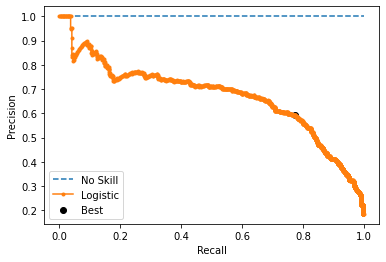

AUC: 0.6712113102995894


In [127]:
model = LogisticRegression(random_state=42,class_weight={0:0.34,1:0.66},penalty='l1',solver='saga',C=29)
steps = [('preprocessing', preprocessor),('model', model)]
pipeline = Pipeline(steps=steps)

#fit pipeline
pipe = pipeline.fit(X_train,y_train)
print(model)

# predict probabilities
yhat = pipe.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

#auc score
auc_prc = auc(recall, precision)
print('AUC: %s' % auc_prc)

C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=78, class_weight={0: 0.26, 1: 0.74}, kernel='linear', probability=True,
    random_state=42)
Best Threshold=0.332006, F-Score=0.670


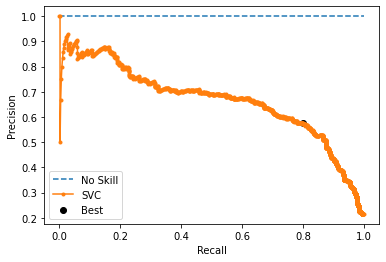

AUC: 0.6672748008932236


In [23]:
model1 = SVC(random_state=42,probability=True,kernel='linear', class_weight= {0: 0.26, 1: 0.74}, C =78)
steps = [('preprocessing', preprocessor),('model', model1)]
pipeline1 = Pipeline(steps=steps)

#fit pipeline
pipe1 = pipeline1.fit(X_train,y_train)
print(model1)

# predict probabilities
yhat1 = pipe1.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 1]

# calculate roc curves
precision1, recall1, thresholds1 = precision_recall_curve(y_test, yhat1)

# convert to f score
fscore1 = (2 * precision1 * recall1) / (precision1 + recall1)

# locate the index of the largest f score
ix1 = argmax(fscore1)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds1[ix1], fscore1[ix1]))

# plot the roc curve for the model
no_skill1 = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill1,no_skill1], linestyle='--', label='No Skill')
pyplot.plot(recall1, precision1, marker='.', label='SVC')
pyplot.scatter(recall1[ix1], precision1[ix1], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

#auc score
auc_prc1 = auc(recall1, precision1)
print('AUC: %s' % auc_prc1)

C:\Users\c2080129\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\c2080129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=2,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=450, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best Threshold=0.566069, F-Score=0.674


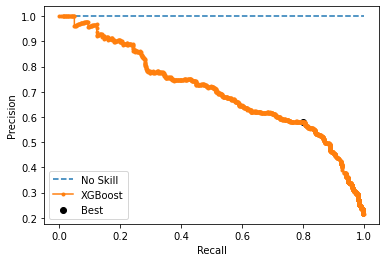

AUC: 0.7031562920865633


In [24]:
#define pipeline
model2 = XGBClassifier(random_state=42,subsample =0.1, scale_pos_weight= 6, n_estimators = 450,
                       min_child_weight=0, max_depth=2, learning_rate=0.001, gamma= 2)
steps = [('preprocessing', preprocessor),('model', model2)]
pipeline2 = Pipeline(steps=steps)

#fit pipeline
pipe2 = pipeline2.fit(X_train,y_train)
print(model2)

# predict probabilities
yhat2 = pipe2.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 1]

# calculate roc curves
precision2, recall2, thresholds2 = precision_recall_curve(y_test, yhat2)

# convert to f score
fscore2 = (2 * precision2 * recall2) / (precision2 + recall2)

# locate the index of the largest f score
ix2 = argmax(fscore2)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds2[ix2], fscore2[ix2]))

# plot the roc curve for the model
no_skill2 = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill2,no_skill2], linestyle='--', label='No Skill')
pyplot.plot(recall2, precision2, marker='.', label='XGBoost')
pyplot.scatter(recall2[ix2], precision2[ix2], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

# show the plot
pyplot.show()

#auc score
auc_prc2 = auc(recall2, precision2)
print('AUC: %s' % auc_prc2)